In [52]:
import csv
import os

with open('inputs.csv', 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["input", "category"])
    
    # SQLi wordlists
    for wf in os.listdir("payloads/sql"):
        with open("payloads/sql/"+wf) as f:
            for line in f:
                writer.writerow([line, "sql"])

    # XSS wordlists
    for wf in os.listdir("payloads/xss"):
        with open("payloads/xss/"+wf) as f:
            for line in f:
                writer.writerow([line, "xss"])


    # LFI wordlists
    for wf in os.listdir("payloads/lfi"):
        with open("payloads/lfi/"+wf) as f:
            for line in f:
                writer.writerow([line, "lfi"])

        
    # Normal wordlists
    for wf in os.listdir("payloads/nonmalicious"):
        with open("payloads/nonmalicious/"+wf) as f:
            for line in f:
                writer.writerow([line, "normal"])

        
    

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [53]:
df1 = pd.read_csv('inputs.csv')

In [54]:
# create index column
df1 = df1.reset_index()
df1.head()

,index,input,category
0,0,# from wapiti\n,sql
1,1,sleep(__TIME__)#\n,sql
2,2,1 or sleep(__TIME__)#\n,sql
3,3,""" or sleep(__TIME__)#\n",sql
4,4,' or sleep(__TIME__)#\n,sql


In [55]:
df1['category'] = pd.Categorical(df1['category'])

In [39]:
def Encoder(df):
    columnsToEncode = list(df.select_dtypes(include=['category','object']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df

In [40]:
df = Encoder(df1)

In [44]:
df

,index,input,category
0,0,242,2
1,1,28331,2
2,2,11305,2
3,3,103,2
4,4,661,2
...,...,...,...
32008,32008,415,1
32009,32009,83,1
32010,32010,13088,1
32011,32011,21294,1


In [50]:
df1.describe()

,index,input
count,32013.00000,32013.000000
mean,16006.00000,14800.246962
std,9241.50142,8518.853512
min,0.00000,0.000000
25%,8003.00000,7658.000000
50%,16006.00000,14605.000000
75%,24009.00000,21968.000000
max,32012.00000,29943.000000


In [51]:
df1.head()

,index,input,category
0,0,242,2
1,1,28331,2
2,2,11305,2
3,3,103,2
4,4,661,2


In [10]:
import seaborn as sns

### EDA analysis

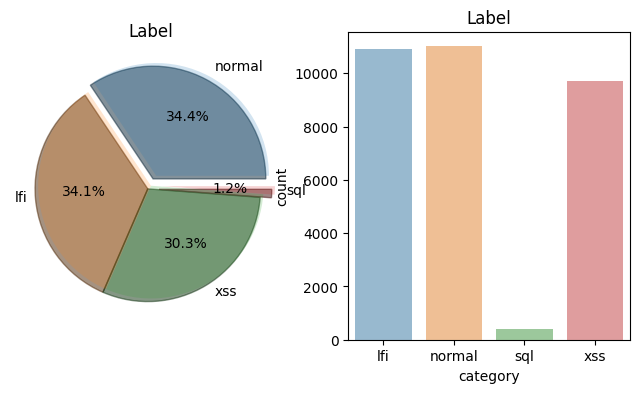

In [58]:
import numpy as np
import matplotlib.pyplot as plt
f,ax=plt.subplots(1,2,figsize=(8,4))
df1['category'].value_counts().plot.pie(explode=[0.1,0,0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, wedgeprops={'alpha':0.2})


ax[0].set_title('Label')
ax[0].set_ylabel('')

sns.countplot(data=df1,x='category',ax=ax[1], alpha=0.5)

ax[1].set_title('Label')
plt.show()